In [61]:
import pandas as pd
import plotly.express as px
import pandas as pd
import numpy as np

1	Id	To count the records.

2	MSSubClass	 Identifies the type of dwelling involved in the sale.

3	MSZoning	Identifies the general zoning classification of the sale.

4	LotArea	 Lot size in square feet.

5	LotConfig	Configuration of the lot

6	BldgType	Type of dwelling

7	OverallCond	Rates the overall condition of the house

8	YearBuilt	Original construction year

9	YearRemodAdd	Remodel date (same as construction date if no remodeling or additions).

10	Exterior1st	Exterior covering on house

11	BsmtFinSF2	Type 2 finished square feet.

12	TotalBsmtSF	Total square feet of basement area

13	SalePrice	To be predicted

# Read and clean the data

In [62]:
# read the data
data = pd.read_excel('Data/HousePricePrediction.xlsx')
data

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [63]:
data.shape

(2919, 13)

In [64]:
data.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
LotConfig        object
BldgType         object
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object

In [65]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [ ]:
# fill missing values with mean
# data['SalePrice'] = data['SalePrice'].fillna(data['SalePrice'].mean())

In [66]:
data = data.dropna()
data

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,60,RL,7917,Inside,1Fam,5,1999,2000,VinylSd,0.0,953.0,175000.0
1456,1456,20,RL,13175,Inside,1Fam,6,1978,1988,Plywood,163.0,1542.0,210000.0
1457,1457,70,RL,9042,Inside,1Fam,9,1941,2006,CemntBd,0.0,1152.0,266500.0
1458,1458,20,RL,9717,Inside,1Fam,6,1950,1996,MetalSd,1029.0,1078.0,142125.0


### Numerical Dataframe & Categorical dataframe

In [67]:
# numerical data
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# categorical data
categorical_data = data.select_dtypes(include=['object'])


### Data Visualization of the numerical data

In [68]:
# create a histogram
fig = px.histogram(data, x='SalePrice', title='Distribution of Sale Price')
fig.show()

In [69]:
# create a bar plot
fig = px.bar(categorical_data, x='MSZoning', title='Number of Houses in Each Neighborhood')
fig.show()

In [70]:
# create a pie chart for the 'LotConfig' column
fig = px.pie(categorical_data, names='LotConfig', title='Distribution of Houses by Lot Configuration')
fig.show()

In [71]:
# create bar plots for all categorical columns
for column in categorical_data.columns:
    fig = px.bar(categorical_data, x=column, title=f'Number of Houses by {column}')
    fig.show()
    

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



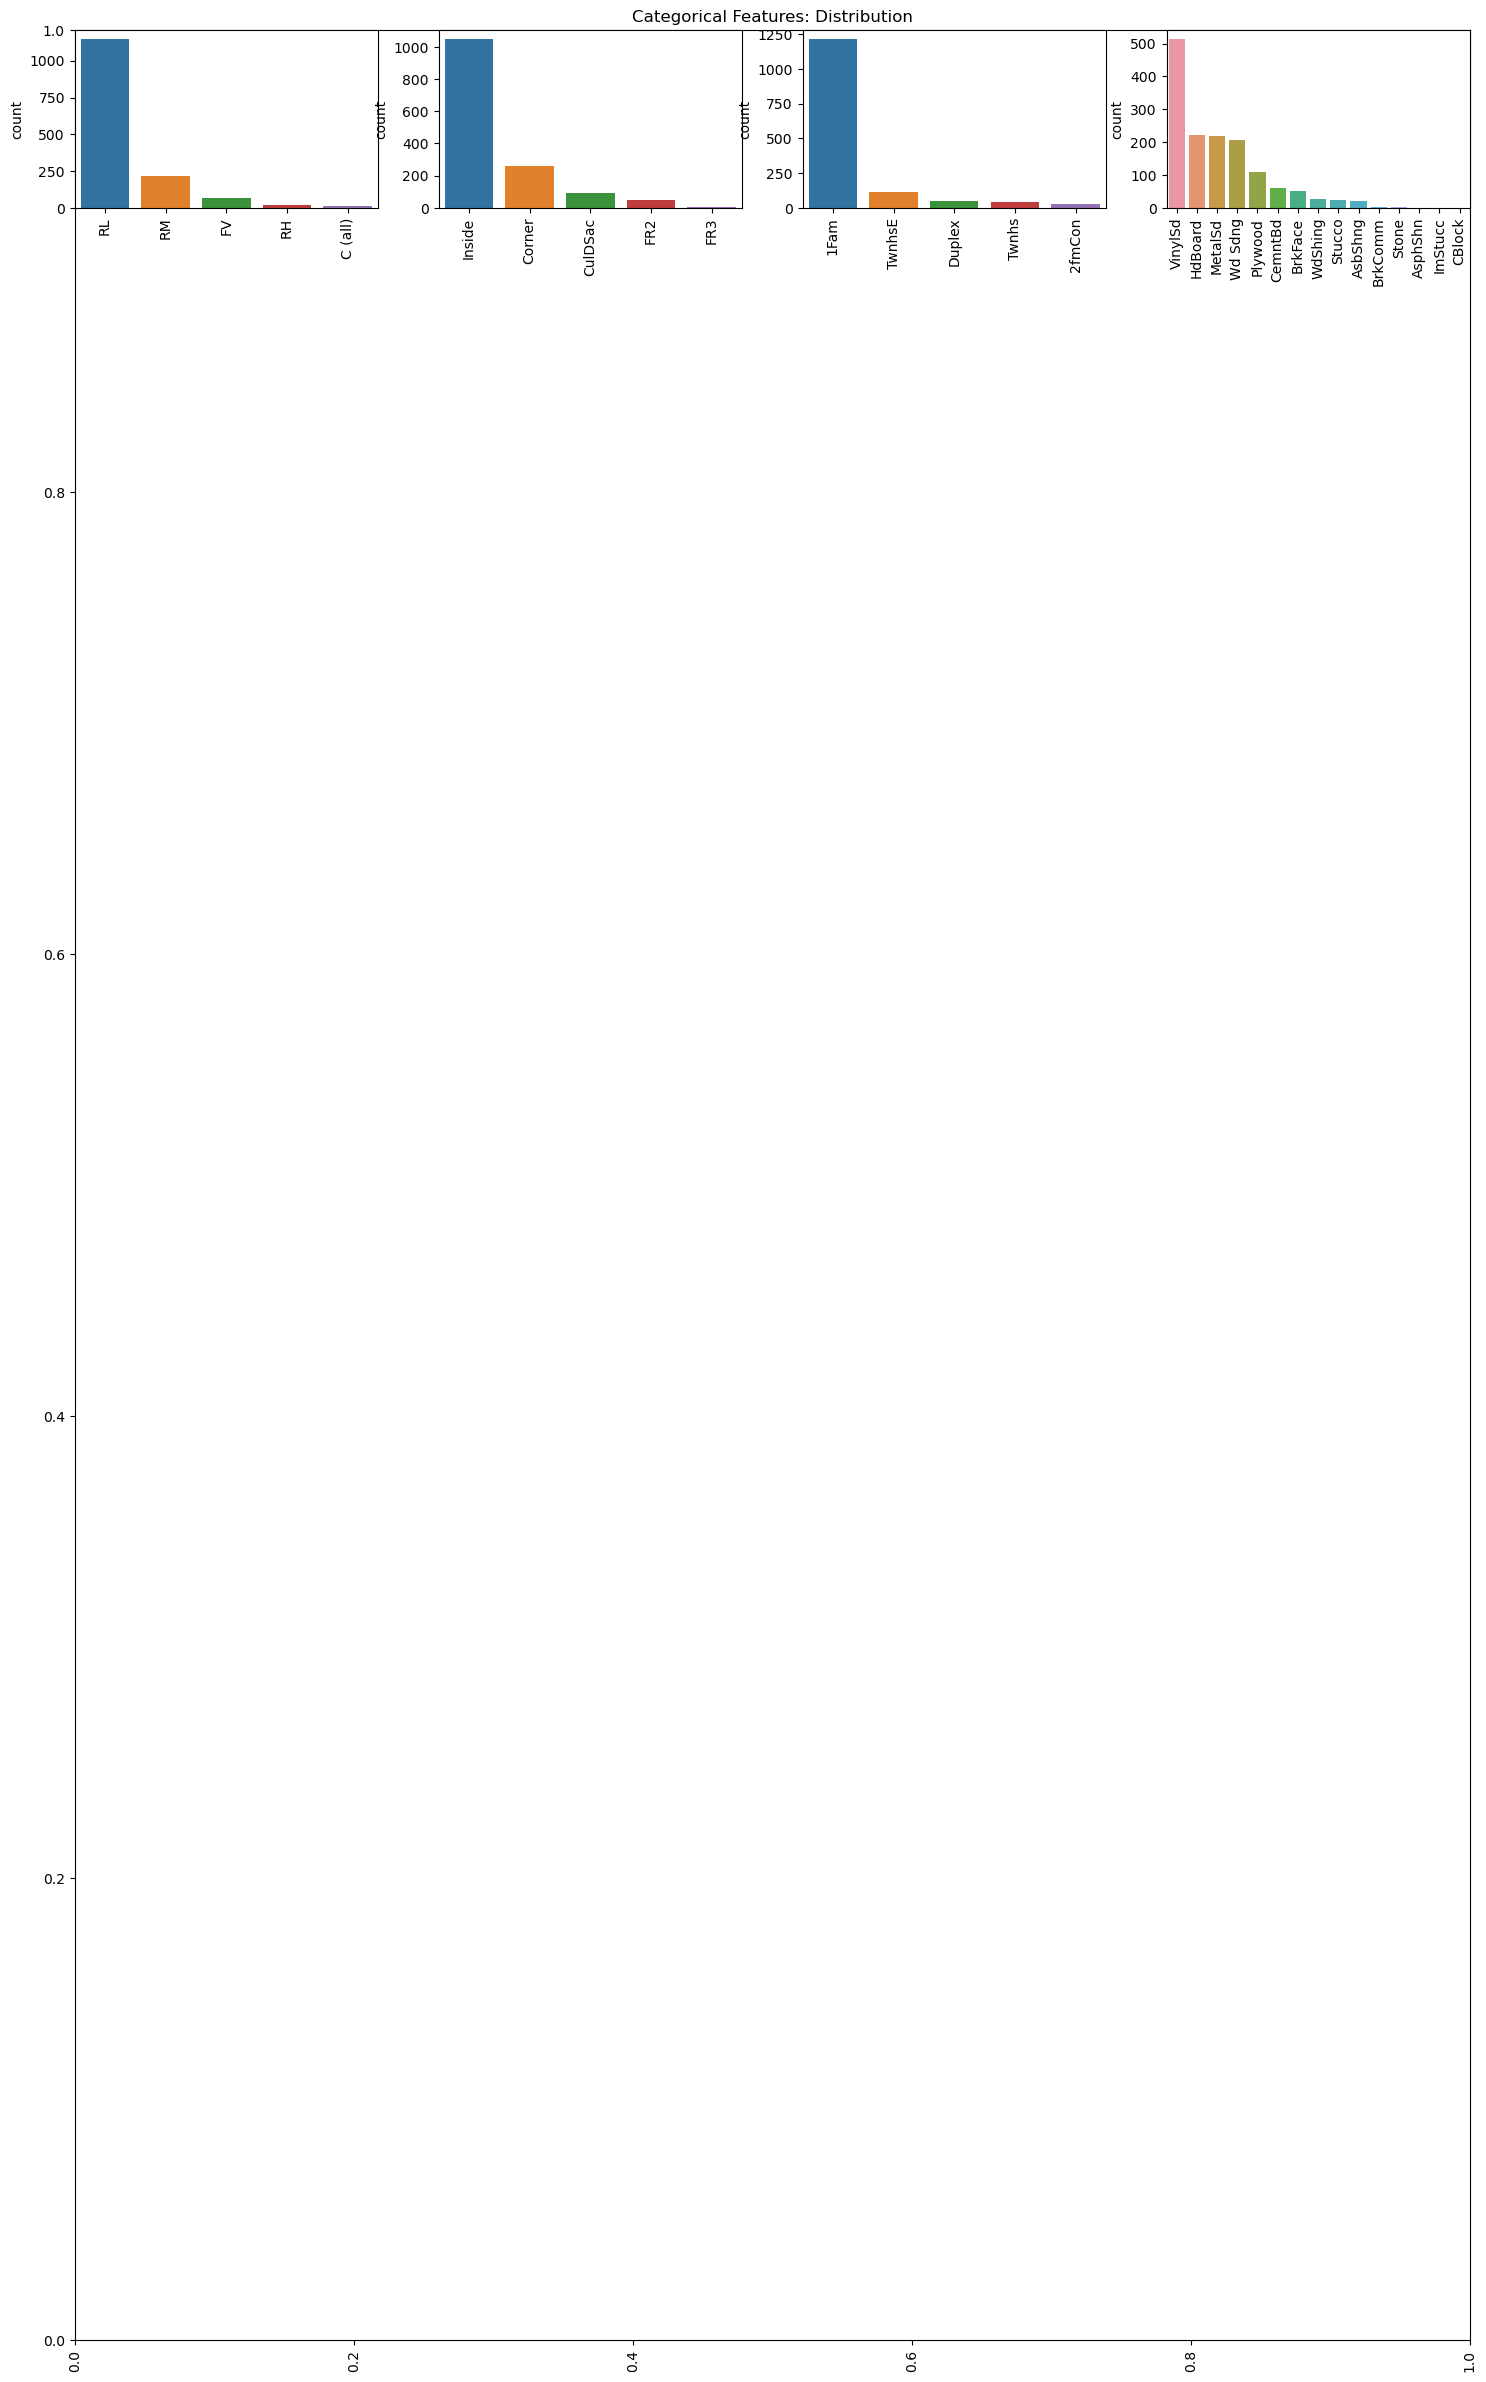

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 30))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
 
for col in categorical_data.columns:
    y = categorical_data[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

In [80]:
# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Create the heatmap using Plotly Express
fig = px.imshow(correlation_matrix,
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='RdBu_r',  # Red-Blue diverging color scale
                zmin=-1,
                zmax=1,
                aspect="auto",
                title='Correlation Heatmap of Numerical Variables')

# Update the layout for better readability
fig.update_layout(
    xaxis_title="",
    yaxis_title="",
    xaxis={'side': 'top'},  # Move x-axis labels to the top
    width=800,
    height=700
)

# Add correlation values as text annotations
for i, row in enumerate(correlation_matrix.values):
    for j, value in enumerate(row):
        fig.add_annotation(
            x=correlation_matrix.columns[j],
            y=correlation_matrix.columns[i],
            text=f"{value:.2f}",
            showarrow=False,
            font=dict(size=8)
        )

# Show the plot
fig.show()